In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import re


In [92]:
def group_lists(lst, func):
    groups = {}
    for item in lst:
        key = func(item)
        if key not in groups:
            groups[key] = []
        groups[key].append(item)
    return groups


Plotting (0,0), Run Config 1
Plotting (0,1), Run Config 1
Plotting (0,1), Run Config 2
Plotting (0,2), Run Config 1
Plotting (0,2), Run Config 2
Plotting (0,2), Run Config 3
Plotting (0,2), Run Config 4
Plotting (1,0), Run Config 1
Plotting (1,1), Run Config 1
Plotting (1,1), Run Config 2
Plotting (1,2), Run Config 1
Plotting (1,2), Run Config 2
Plotting (1,2), Run Config 3
Plotting (1,2), Run Config 4


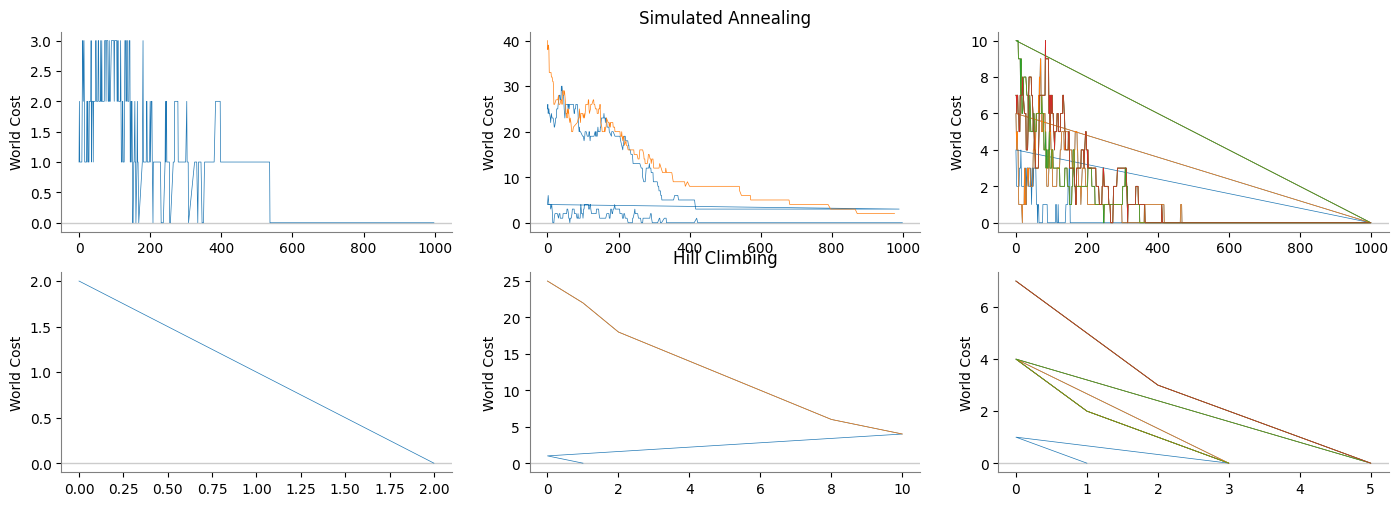

In [90]:
# Setup all figure and axes
palette = sns.color_palette()
fig, axes = plt.subplots(2, 3, figsize=(14, 5))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
axes[0, 1].set_title("Simulated Annealing")
axes[1, 1].set_title("Hill Climbing")

# Loop over and initialize all axes
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('gray')
        ax.spines['bottom'].set_color('gray')
        ax.axhline(0, color="#cccccc", linewidth=1)

        # Calculate data path prefix and find all files
        path = f"{[ 'sa', 'hc' ][i]}_p{j + 1}_"
        files = [ f for f in os.listdir("half") if f.startswith(path) ]
        run_configs = group_lists(files, lambda f: re.search(r".*rc([0-9]).*", f).group(1))

        # Find best run for each run config
        plotted_dfs = []
        for rc in run_configs:
            rc_dfs = []
            for k, filename in enumerate(run_configs[rc]):
                rc_dfs.append(pd.read_csv(f"half/{filename}"))
            best_df = rc_dfs[np.argmax([ df["Fitness"].max() for df in rc_dfs ])]

            # Plot world cost as -fitness
            best_df["Fitness"] *= -1
            color = palette[int(rc) - 1]
            label = f"Run Config {rc}"
            print(f"Plotting ({i},{j}), {label}")
            sns.lineplot(data=best_df, x="Iteration", y="Fitness", ax=ax, color=color, linewidth=0.5, label=label, errorbar=None)
            plotted_dfs.append(best_df)

        # Set yticks to include min and max of each df
        yticks = set()
        for df in plotted_dfs:
            yticks.add(df["Fitness"].iloc[0])
            yticks.add(df["Fitness"].iloc[-1])
        
        ax.set_xticks([0, max([ df["Iteration"].max() for df in plotted_dfs ]) ])
        ax.set_yticks(list(yticks))
        ax.set_xlabel("")
        ax.set_ylabel("World Cost")

plt.show()


Plotting (0,0), Run Config 1
Plotting (0,1), Run Config 1
Plotting (0,1), Run Config 2
Plotting (0,2), Run Config 1
Plotting (0,2), Run Config 2
Plotting (1,0), Run Config 1
Plotting (1,1), Run Config 1
Plotting (1,1), Run Config 2
Plotting (1,2), Run Config 1
Plotting (1,2), Run Config 2


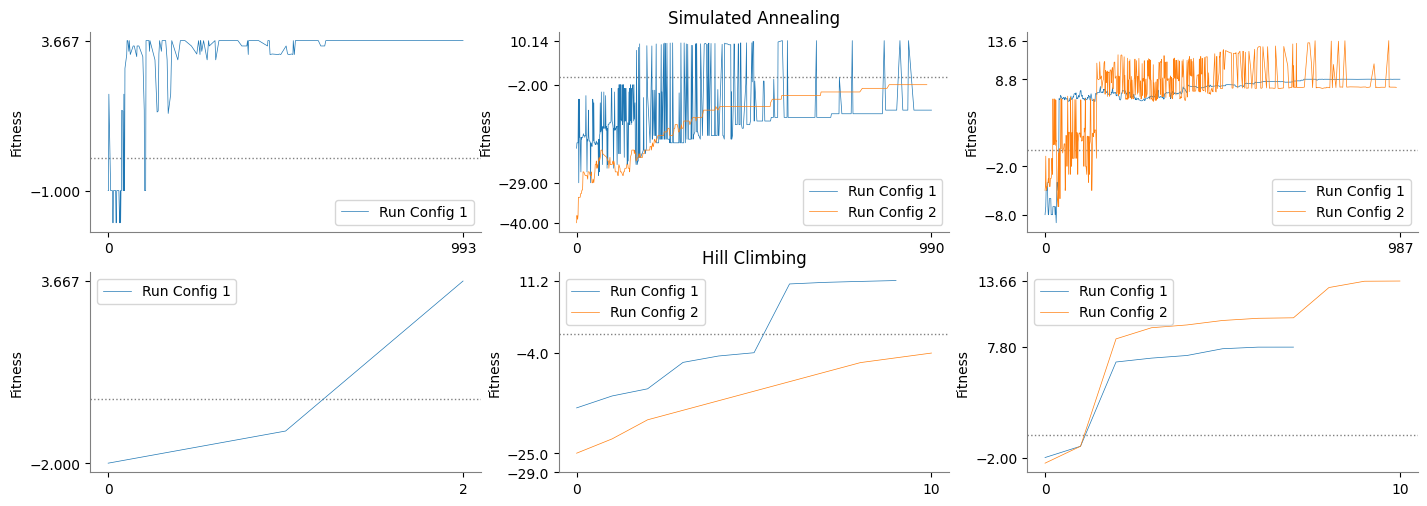

In [62]:
# Setup all figure and axes
palette = sns.color_palette()
fig, axes = plt.subplots(2, 3, figsize=(14, 5))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
axes[0, 1].set_title("Simulated Annealing")
axes[1, 1].set_title("Hill Climbing")

# Loop over and initialize all axes
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('gray')
        ax.spines['bottom'].set_color('gray')
        ax.axhline(0, color="grey", linewidth=1, linestyle="dotted")

        # Calculate data path prefix and find all files
        path = f"{[ 'sa', 'hc' ][i]}_p{j + 1}_"
        files = [ f for f in os.listdir("full") if f.startswith(path) ]
        run_configs = group_lists(files, lambda f: re.search(r".*rc([0-9]).*", f).group(1))

        # Find best run for each run config
        plotted_dfs = []
        for rc in run_configs:
            rc_dfs = []
            for k, filename in enumerate(run_configs[rc]):
                rc_dfs.append(pd.read_csv(f"full/{filename}"))
            best_df = rc_dfs[np.argmax([ df["Fitness"].max() for df in rc_dfs ])]

            # Plot fitness
            color = palette[int(rc) - 1]
            label = f"Run Config {rc}"
            print(f"Plotting ({i},{j}), {label}")
            sns.lineplot(data=best_df, x="Iteration", y="Fitness", ax=ax, color=color, linewidth=0.5, label=label, errorbar=None)
            plotted_dfs.append(best_df)

        # Set yticks to include min and max of each df
        yticks = set()
        for df in plotted_dfs:
            yticks.add(df["Fitness"].iloc[0])
            yticks.add(df["Fitness"].iloc[-1])
        
        ax.set_xticks([0, max([ df["Iteration"].max() for df in plotted_dfs ]) ])
        ax.set_yticks(list(yticks))
        ax.set_xlabel("")
        ax.set_ylabel("Fitness")

plt.show()


sa_p2_rc1(r0).csv
sa_p2_rc2(r0).csv


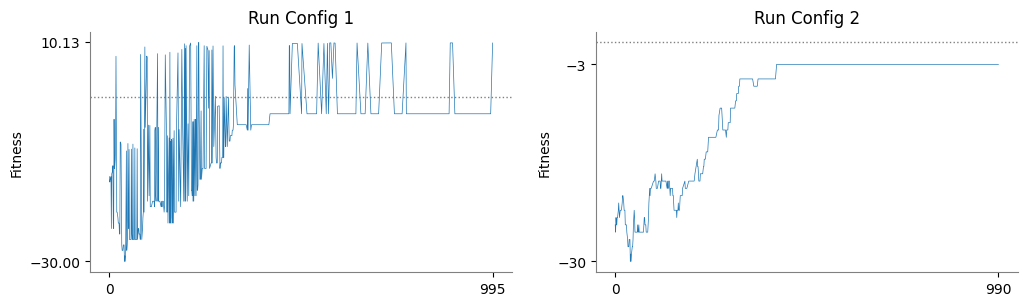

In [82]:
# Setup all figure and axes
palette = sns.color_palette()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

axes[0].set_title("Run Config 1")
axes[1].set_title("Run Config 2")

# Loop over and initialize all axes
for i, ax in enumerate(axes):
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.axhline(0, color="grey", linewidth=1, linestyle="dotted")

    # Calculate data path prefix and find all files
    path = f"sa_p2_rc{i + 1}"
    files = [ f for f in os.listdir("full") if f.startswith(path) ]
    run_configs = group_lists(files, lambda f: re.search(r".*rc([0-9]).*", f).group(1))

    # Plot all runs for each run config
    plotted_dfs = []
    for rc in run_configs:
        rc_dfs = []
        for k, filename in enumerate(run_configs[rc]):
            print(filename)
            df = pd.read_csv(f"full/{filename}")
            sns.lineplot(data=df, x="Iteration", y="Fitness", ax=ax, color=palette[k], linewidth=0.5, errorbar=None)
            plotted_dfs.append(df)
            break

    # Set yticks to include min and max of each df
    yticks = [
        min([ df["Fitness"].min() for df in plotted_dfs ]),
        max([ df["Fitness"].max() for df in plotted_dfs ])
    ]
    ax.set_xticks([0, max([ df["Iteration"].max() for df in plotted_dfs ]) ])
    ax.set_yticks(yticks)
    ax.set_xlabel("")
    ax.set_ylabel("Fitness")

plt.show()


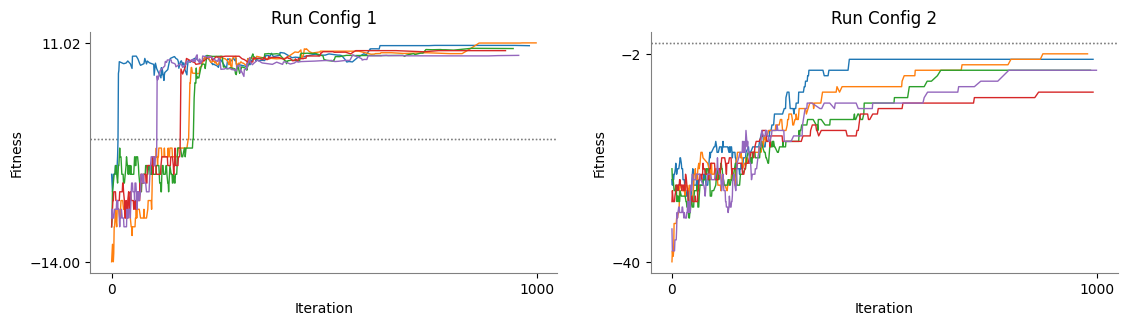

In [29]:
df_names_rc1 = [
    "p2_full_sa_rc-1_srand-0.csv",
    "p2_full_sa_rc-1_srand-1.csv",
    "p2_full_sa_rc-1_srand-2.csv",
    "p2_full_sa_rc-1_srand-3.csv",
    "p2_full_sa_rc-1_srand-4.csv"
]
df_names_rc2 = [
    "p2_full_sa_rc-2_srand-0.csv",
    "p2_full_sa_rc-2_srand-1.csv",
    "p2_full_sa_rc-2_srand-2.csv",
    "p2_full_sa_rc-2_srand-3.csv",
    "p2_full_sa_rc-2_srand-4.csv"
]


# Setup all figure and axes
colors = sns.color_palette("tab10")
fig, axes = plt.subplots(1, 2, figsize=(11, 3))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Setup axes
for ax in axes:
    ax.axhline(0, color="grey", linewidth=1, linestyle="dotted")
    ax.axhline(0, color="grey", linewidth=1, linestyle="dotted")
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.set_xticks([0, 1000])
    ax.set_xlabel("")
    ax.set_ylabel("Fitness")
axes[0].set_title("Run Config 1")
axes[1].set_title("Run Config 2")

dfs_rc1 = []
for i in range(len(df_names_rc1)):
    df = pd.read_csv(df_names_rc1[i])
    sns.lineplot(data=df, x="Iteration", y="Fitness", ax=axes[0], color=colors[i % len(colors)], linewidth=1)
    dfs_rc1.append(df)

yticks = []
yticks.append(min([ df["Fitness"].min() for df in dfs_rc1 ]))
yticks.append(max([ df["Fitness"].max() for df in dfs_rc1 ]))
axes[0].set_yticks(yticks)

dfs_rc2 = []
for i in range(len(df_names_rc2)):
    df = pd.read_csv(df_names_rc2[i])
    sns.lineplot(data=df, x="Iteration", y="Fitness", ax=axes[1], color=colors[i % len(colors)], linewidth=1)
    dfs_rc2.append(df)

yticks = []
yticks.append(min([ df["Fitness"].min() for df in dfs_rc2 ]))
yticks.append(max([ df["Fitness"].max() for df in dfs_rc2 ]))
axes[1].set_yticks(yticks)

plt.show()
